In [1]:
import pandas as pd
import json as json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
import ast

In [2]:
# Cargar Data Sets

dfMoviesFinal = pd.read_csv('Data/dfMoviesNormal.csv', dtype=str, encoding='UTF-8', decimal='.', quotechar='"')

In [55]:
dfCreditsFinal = pd.read_csv('Data/dfCreditsNormal.csv', dtype=str, encoding='UTF-8', decimal='.', quotechar='"')

In [3]:
dfMoviesFinal.columns

Index(['budget', 'id_pelicula', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'release_year', 'return', 'id_genres',
       'name_genres', 'name_production_companies', 'id_production_companies',
       'iso_3166_1_production_countries', 'name_production_countries',
       'iso_639_1_spoken_languages', 'name_spoken_languages'],
      dtype='object')

In [5]:
dfMoviesFinal.drop(columns=['id_genres', 'id_production_companies', 'iso_3166_1_production_countries', 'iso_639_1_spoken_languages' ], inplace=True)
dfMoviesFinal.drop(columns=['original_language', 'status'], inplace=True)

In [6]:
dfMoviesSintetico = dfMoviesFinal.drop_duplicates(subset='id_pelicula', keep='first')

In [85]:
dfMoviesSintetico

,budget,id_pelicula,overview,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,release_year,return,name_genres,name_production_companies,name_production_countries,name_spoken_languages
0,30000000.0,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,NaN,Toy Story,7.7,5415.0,1995.0,12.451801,Animation,Pixar Animation Studios,United States of America,English
12,65000000.0,8844,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995.0,4.043035,Adventure,TriStar Pictures,United States of America,English
30,0.0,15602,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995.0,0.000000,Romance,Warner Bros.,United States of America,English
46,16000000.0,31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995.0,5.090760,Comedy,Twentieth Century Fox Film Corporation,United States of America,English
49,0.0,11862,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995.0,0.000000,Comedy,Sandollar Productions,United States of America,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581903,0.0,30840,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0,104.0,NaN,Robin Hood,5.7,26.0,1991.0,0.000000,Drama,Westdeutscher Rundfunk (WDR),Canada,English
581951,0.0,111109,An artist struggles to finish his work while a...,0.178241,2011-11-17,0,360.0,NaN,Century of Birthing,9.0,3.0,2011.0,0.000000,Drama,Sine Olivia,Philippines,NaN
581952,0.0,67758,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0,90.0,A deadly game of wits.,Betrayal,3.8,6.0,2003.0,0.000000,Action,American World Pictures,United States of America,English
581955,0.0,227506,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0,87.0,NaN,Satan Triumphant,0.0,0.0,1917.0,0.000000,NaN,Yermoliev,Russia,NaN


In [9]:

# Lista de columnas que deseas describir
columns_to_describe = ['budget', 'id_pelicula', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return','release_year']

# Convertir columnas a tipo numérico
dfMoviesSintetico[columns_to_describe] = dfMoviesSintetico[columns_to_describe].apply(pd.to_numeric, errors='coerce')

# Verificar si hay columnas vacías después de la conversión
print(dfMoviesSintetico[columns_to_describe].isnull().sum())




budget            0
id_pelicula       0
popularity        0
revenue           0
runtime         246
vote_average      0
vote_count        0
return            0
release_year      0
dtype: int64


C:\Users\Pablo\AppData\Local\Temp\ipykernel_13460\3366324584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMoviesSintetico[columns_to_describe] = dfMoviesSintetico[columns_to_describe].apply(pd.to_numeric, errors='coerce')


In [11]:
# Verificar los tipos de datos de las columnas
print(dfMoviesSintetico.dtypes)

budget                       float64
id_pelicula                    int64
overview                      object
popularity                   float64
release_date                  object
revenue                        int64
runtime                      float64
tagline                       object
title                         object
vote_average                 float64
vote_count                   float64
release_year                 float64
return                       float64
name_genres                   object
name_production_companies     object
name_production_countries     object
name_spoken_languages         object
dtype: object


In [12]:
# Filtrar solo columnas numéricas
numeric_columns = dfMoviesSintetico.select_dtypes(include=['float64', 'int64']).columns


Descripción de las columnas seleccionadas:
         popularity       runtime  vote_average  release_year
count  45346.000000  45100.000000  45346.000000  45346.000000
mean       2.926188     94.177805      5.624196   1991.882834
std        6.010970     38.348775      1.915339     24.053040
min        0.000000      0.000000      0.000000   1874.000000
25%        0.388732     85.000000      5.000000   1978.000000
50%        1.130176     95.000000      6.000000   2001.000000
75%        3.689337    107.000000      6.800000   2010.000000
max      547.488298   1256.000000     10.000000   2020.000000


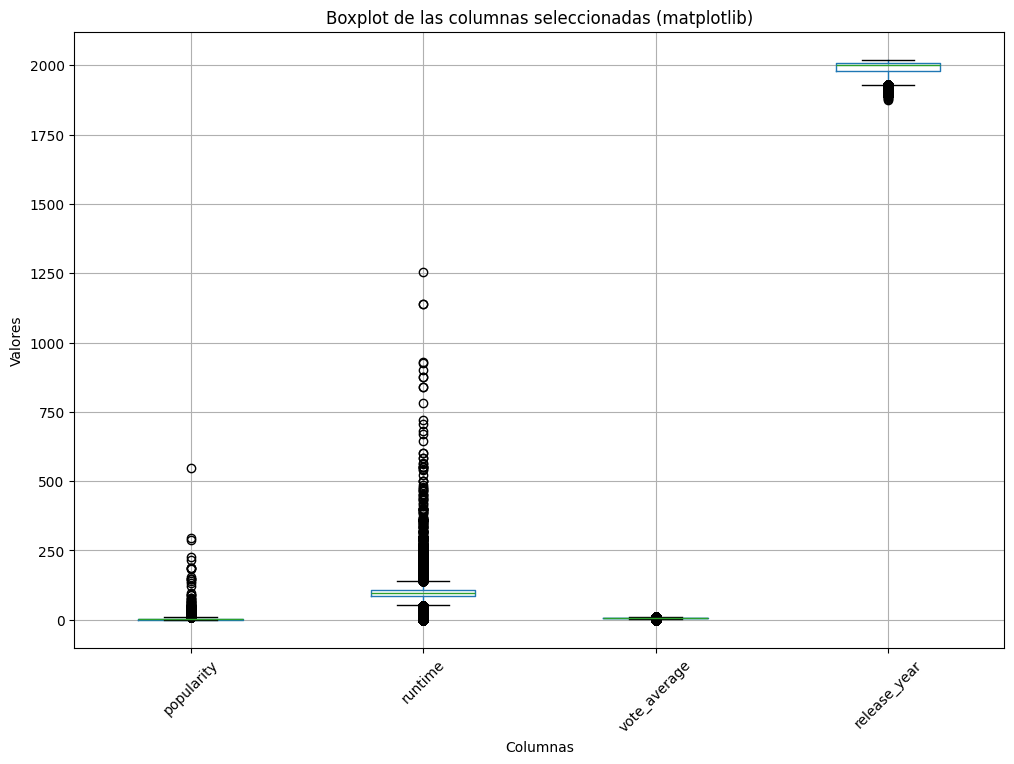

In [13]:
# Verificar la descripción de las columnas seleccionadas
columns_to_describe = ['popularity', 'runtime', 'vote_average', 'release_year']
print("\nDescripción de las columnas seleccionadas:")
print(dfMoviesSintetico[columns_to_describe].describe())  # Selección correcta de columnas

# Crear el boxplot con matplotlib
plt.figure(figsize=(12, 8))
dfMoviesSintetico.boxplot(column=columns_to_describe)
plt.title('Boxplot de las columnas seleccionadas (matplotlib)')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
plt.show()


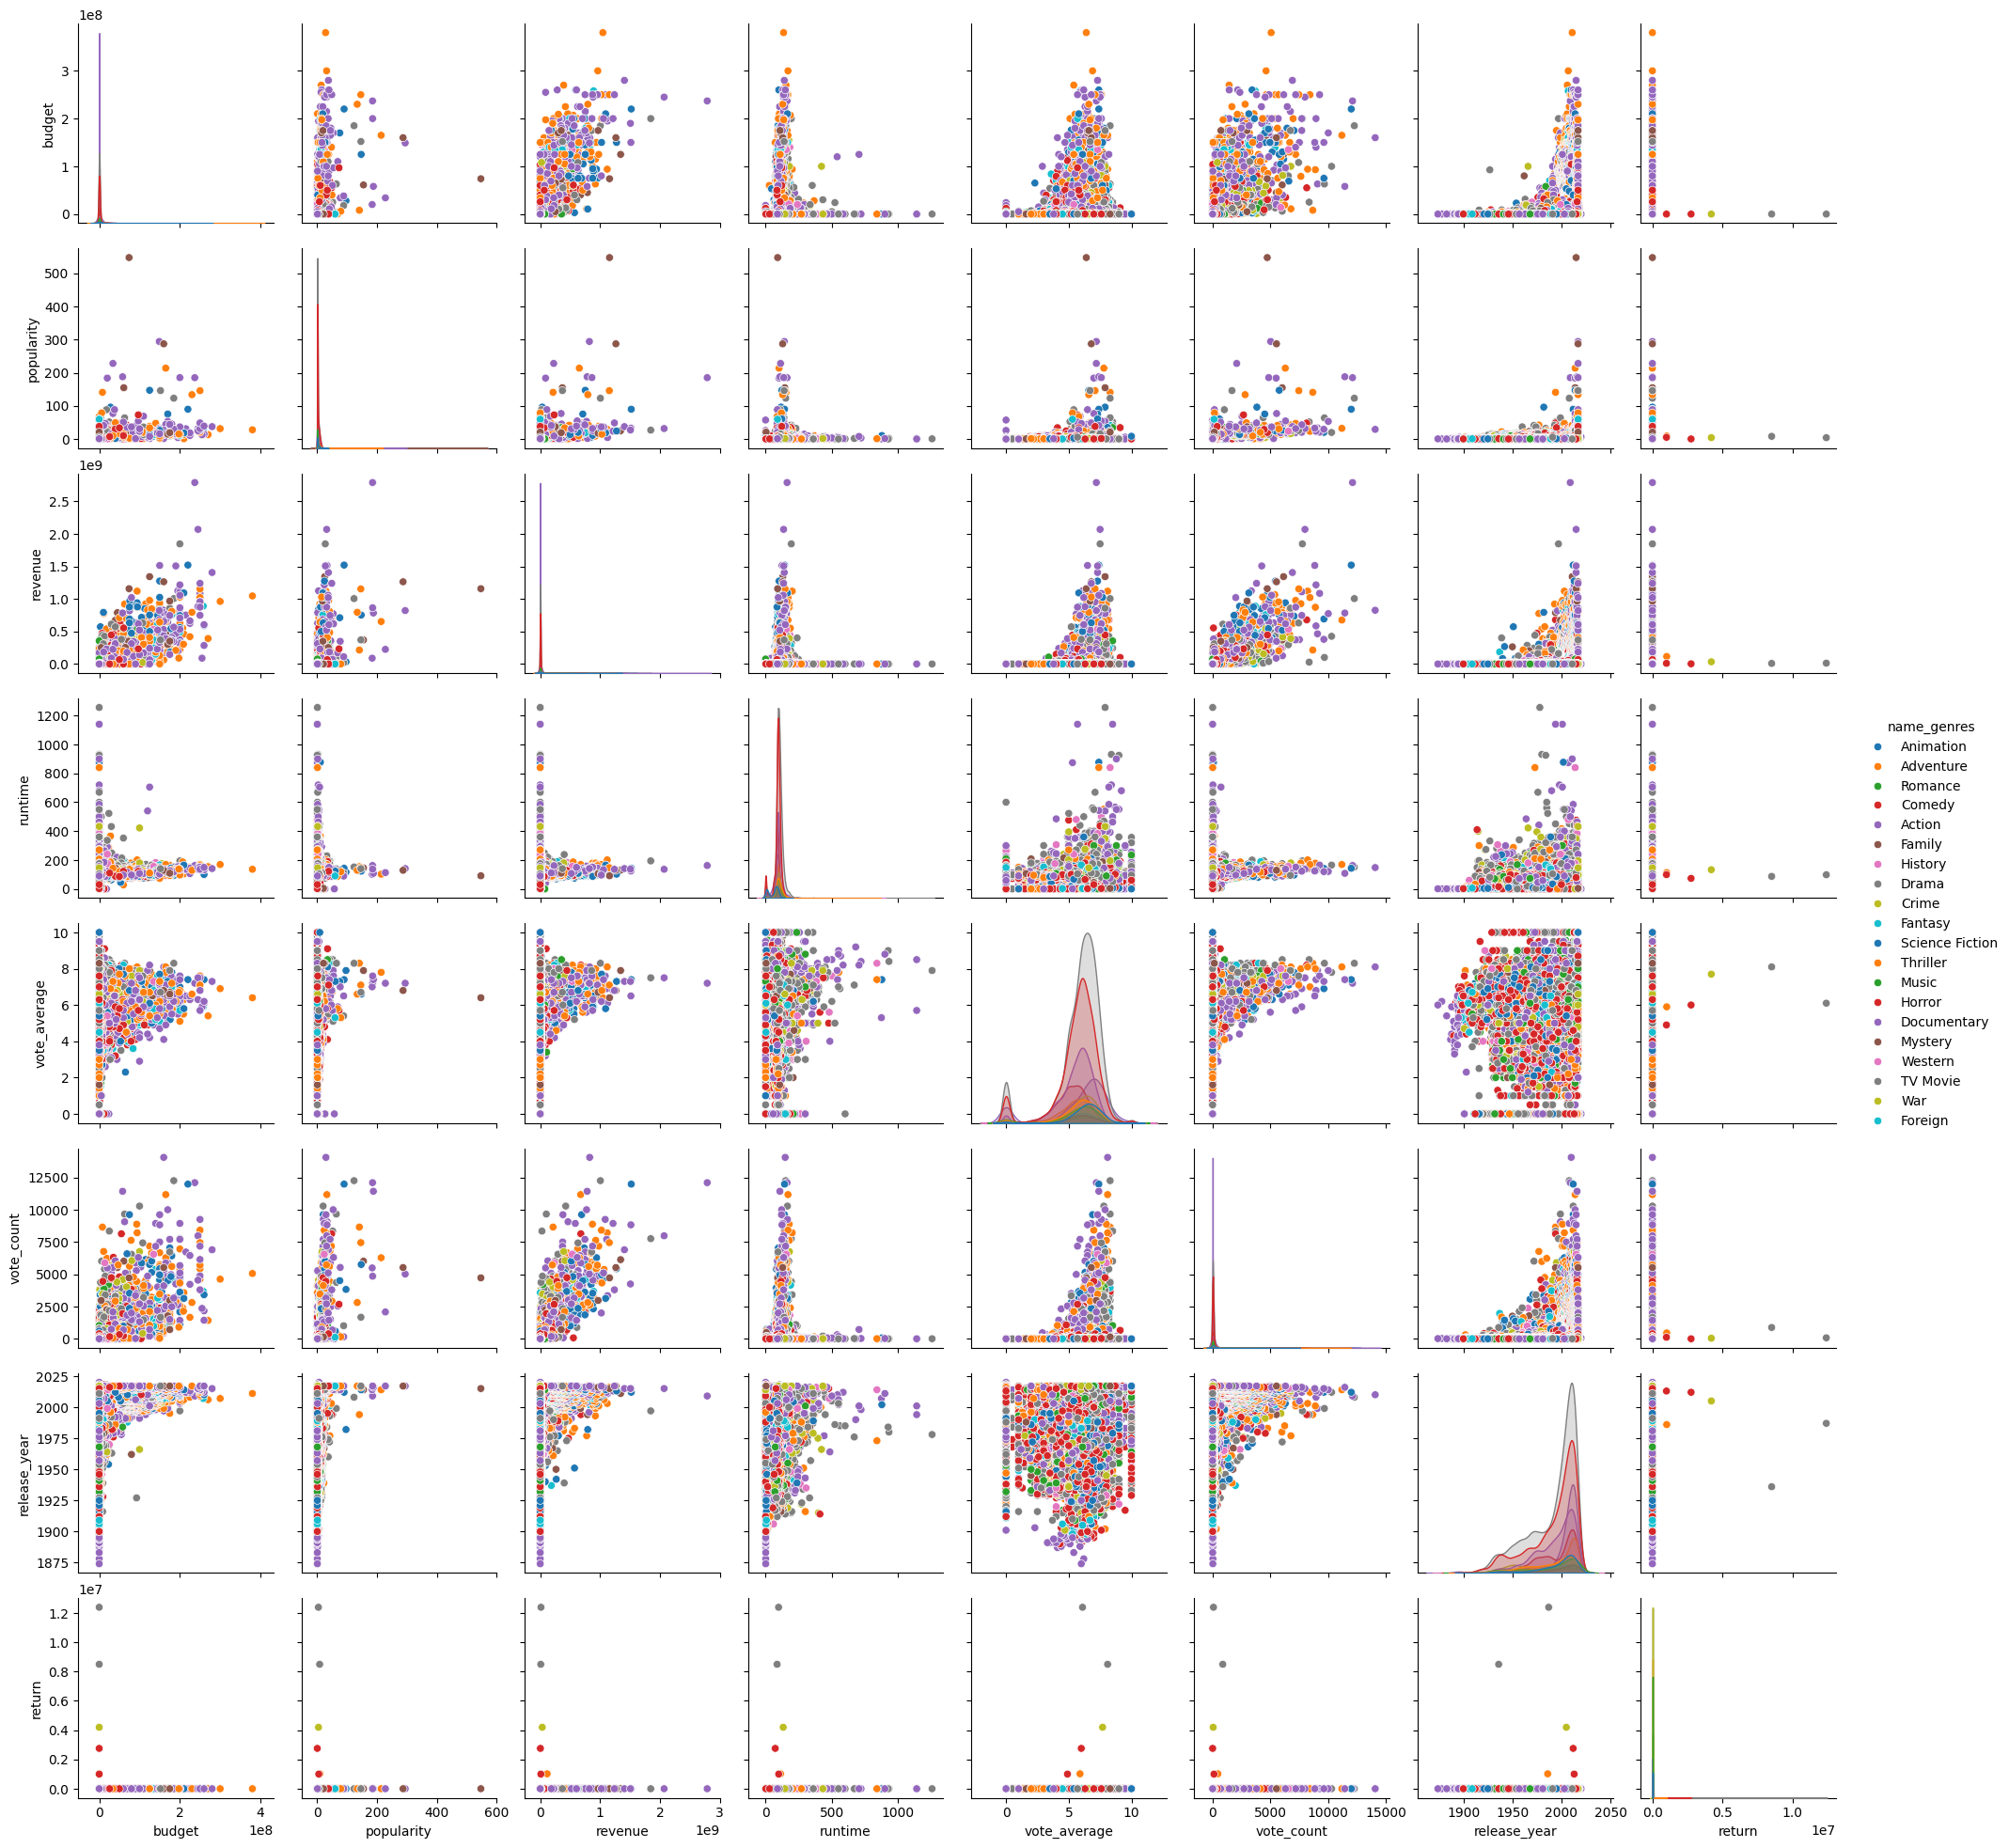

ValueError: could not convert string to float: 'Animation'

<Figure size 1200x1000 with 0 Axes>

In [18]:
# Filtrar solo las columnas numéricas
numeric_columns = dfMoviesSintetico.select_dtypes(include='number').drop(columns=['id_pelicula'], inplace=False)

# Agregar una columna categórica para usar en hue en el pairplot
dfMovies_filtered = dfMoviesSintetico.copy()  # Crear una copia del DataFrame original
dfMovies_filtered = dfMovies_filtered[numeric_columns.columns.tolist() + ['name_genres']]

# Filtrar para eliminar filas con valores NaN en la columna categórica 
dfMovies_filtered = dfMovies_filtered.dropna(subset=['name_genres'])

# Crear el pairplot
sns.pairplot(dfMovies_filtered, hue='name_genres', palette='tab10')  

# Mostrar el gráfico
plt.show()





In [56]:
dfMovies_filtered.columns

Index(['budget', 'id_pelicula', 'overview', 'popularity', 'release_date',
       'revenue', 'runtime', 'tagline', 'title', 'vote_average', 'vote_count',
       'release_year', 'return', 'name_production_companies',
       'name_production_countries', 'name_spoken_languages'],
      dtype='object')

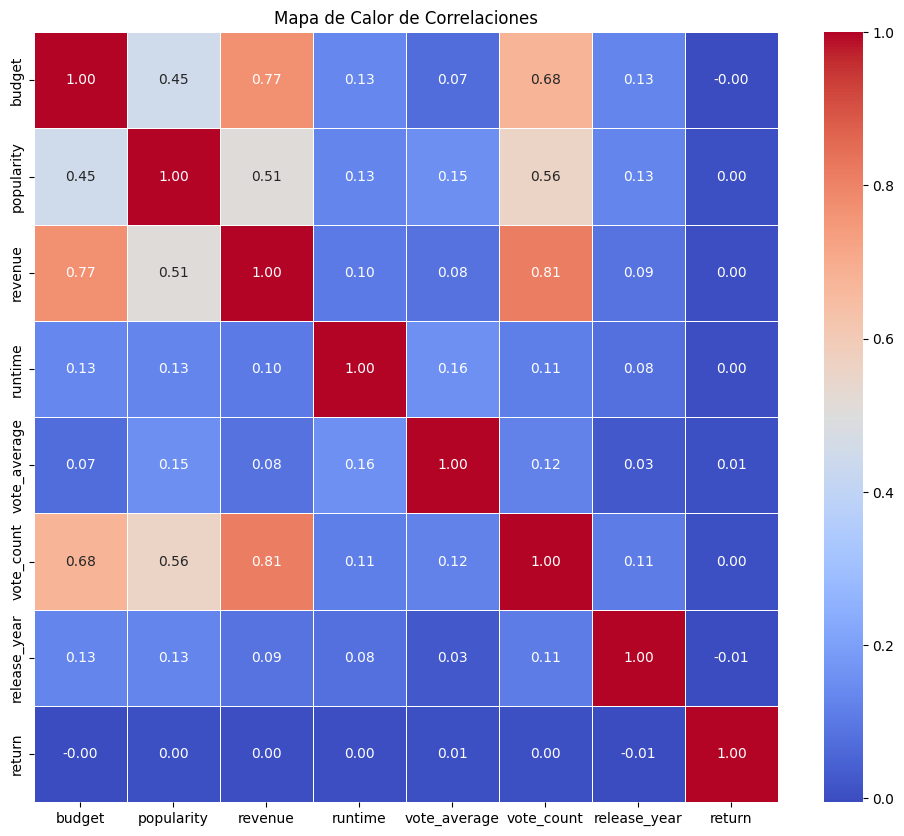

In [36]:
# Filtrar solo las columnas numéricas
numeric_columns = dfMoviesSintetico.select_dtypes(include='number').drop(columns=['id_pelicula'], inplace=False)

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))  # Ajusta el tamaño de la figura según sea necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [66]:
dfCreditsFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7188072 entries, 0 to 7188071
Data columns (total 8 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id_pelicula     object
 1   character_cast  object
 2   gender_cast     object
 3   name_cast       object
 4   order_cast      object
 5   gender_crew     object
 6   job_crew        object
 7   name_crew       object
dtypes: object(8)
memory usage: 438.7+ MB


In [59]:
dfCreditsFinal.drop(columns=['profile_path_cast', 'id_crew', 'cast_id_cast'], inplace=True)

In [60]:
dfCreditsFinal.drop(columns=['credit_id_cast', 'id_cast', 'credit_id_crew', 'department_crew', 'profile_path_crew'], inplace=True)

In [71]:
# Crear el primer DataFrame con las columnas especificadas
dfCast = dfCreditsFinal[['id_pelicula', 'character_cast', 'gender_cast', 'name_cast', 'order_cast']]

# Crear el segundo DataFrame con las columnas especificadas
dfCrew = dfCreditsFinal[['id_pelicula', 'gender_crew', 'job_crew', 'name_crew']]


In [84]:
dfCast

,id_pelicula,character_cast,gender_cast,name_cast,order_cast
0,862,Woody (voice),2.0,Tom Hanks,0.0
1,862,Woody (voice),2.0,Tom Hanks,0.0
2,862,Woody (voice),2.0,Tom Hanks,0.0
3,862,Woody (voice),2.0,Tom Hanks,0.0
4,862,Woody (voice),2.0,Tom Hanks,0.0
...,...,...,...,...,...
7188067,265712,野比玉子/大雄媽媽,0.0,許淑嬪,23.0
7188068,265712,野比大助/大雄爸爸,0.0,劉傑,24.0
7188069,265712,野比大助/大雄爸爸,0.0,劉傑,24.0
7188070,265712,野比大助/大雄爸爸,0.0,劉傑,24.0


In [80]:
# Eliminar filas duplicadas basadas en las columnas 'name_cast' y 'character_cast'
dfCastFinal = dfCast.drop_duplicates(subset=['name_cast', 'character_cast'], keep='first')


In [86]:
# Exportar dfCastFinal a un archivo Parquet
dfCastFinal.to_parquet('dfCastFinal.parquet', index=False, engine='pyarrow')

# Exportar dfCrew a un archivo Parquet
dfCrew.to_parquet('dfCrew.parquet', index=False, engine='pyarrow')

# Exportar dfMoviesSintetico a un archivo Parquet
dfMoviesSintetico.to_parquet('dfMoviesSintetico.parquet', index=False, engine='pyarrow')